In [25]:
# #input citylist, output Longitude&_Latitude
# def getLocation( cityList ):
#     '''
#     This function will generate the latitude and longitude of the given city
#     list, where these cities are in California. The return value will be 
#     dictionary with key as city name.
#     '''
    
#     # import the library
#     from geopy.geocoders import Nominatim
    
#     # convert cities into dic
# #     cityDic = dict.fromkeys( cityList )
#     citylst=[]
    
#     from geopy.geocoders import Nominatim
#     geolocator = Nominatim()
    
#     for city in cityList:
#         location = geolocator.geocode( city + ' California' )
#         citylst.append([ location.raw['lon'], location.raw['lat'])
    
#     return citylst

# print(getLocation(['SAN JOAQUIN']))

In [26]:
# #Get the citylist
# #table 6_column 2
# filename='2015_Redbook_FINAL.xlsx'
# def citylist(filename):
#     assert isinstance(filename,str)
#     import xlrd
#     data=xlrd.open_workbook(filename)


#     table=data.sheets()[6]
#     counties=table.col_values(1)

#     #delete all '' items
#     while '' in counties:
#         counties.remove('')

#     counties=[item.encode("utf-8") for item in counties]
#     counties.pop(0) #delete 'County'
#     return counties

# citylist('2015_Redbook_FINAL.xlsx')
# for item in citylist('2015_Redbook_FINAL.xlsx'):
#     print type(item)
# print(getLocation(citylist('2015_Redbook_FINAL.xlsx')).values()

In [27]:
# getLocation(citylist('2015_Redbook_FINAL.xlsx'))

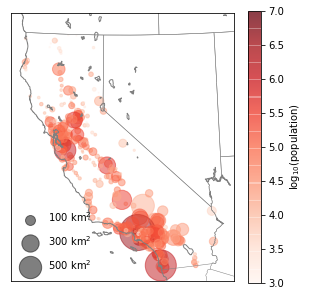

In [28]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd
#cities = pd.read_csv('california_cities.csv')
cities = pd.read_csv("https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv")
# 提取感兴趣的数据
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values
# 1. 绘制地图背景
fig = plt.figure(figsize=(5, 5))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
# m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. 绘制城市样本散点，其中颜色代表人口，点的大小代表面积 
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. 构建色彩轴与图例
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# 构建图例对应的虚拟散点标签
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
             labelspacing=1, loc='lower left')
plt.savefig("population_geo.png")
plt.show()


In [29]:
fires = pd.read_csv('Counties_16.csv',names=['1','2','3','4'])

In [30]:
fires

,1,2,3,4
0,Alameda,-48.395570,-1.339586,39
1,Alpine,-119.834501,38.589393,0
2,Amador,-120.591102,38.449089,57
3,Butte,-121.585844,39.651927,0
4,Calaveras,-120.498149,38.255818,94
5,Colusa,-122.220956,39.146558,4
6,Contra Costa,-121.917535,37.903481,28
7,Del Norte,-123.913280,41.726177,28
8,El Dorado,-120.527613,38.757414,169
9,Fresno,-119.708861,36.729529,106


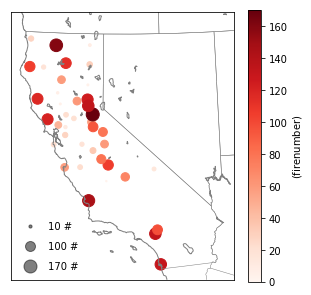

In [31]:
lat = fires['3'].values
lon = fires['2'].values
population = fires['4'].values
area = fires['4'].values
# 1. 绘制地图背景
fig = plt.figure(figsize=(5, 5))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
# m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. 绘制城市样本散点，其中颜色代表人口，点的大小代表面积 
m.scatter(lon, lat, latlon=True,
          c=population, s=area,
          cmap='Reds', alpha=1.5)

# 3. 构建色彩轴与图例
plt.colorbar(label=r'$({\rm firenumber})$')
plt.clim(0, 170)

# 构建图例对应的虚拟散点标签
for a in [10, 100, 170]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' #')
plt.legend(scatterpoints=1, frameon=False,
             labelspacing=1, loc='lower left')
plt.savefig("firenumber_geo.png")
plt.show()
